In [1]:
import rioxarray
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def print_raster_stats(raster):
    s = raster.rio.shape
    n = s[0]*s[1]
    nnan = np.sum(np.isnan(raster.values))
    mean = np.nanmean(raster.values)
    median = np.nanmedian(raster.values)
    rmin = np.nanmin(raster.values)
    rmax = np.nanmax(raster.values)
    rmsd = np.sqrt(np.nanmean((raster.values)**2))
    print(
        f"shape: {raster.rio.shape}\n"
        f"resolution: {raster.rio.resolution()}\n"
        f"bounds: {raster.rio.bounds()}\n"
        f"n: {n}\n"
        f"nnan: {nnan}\n"
        f"mean: {mean:.3f}\n"
        f"median:  {median:.3f}\n"
        f"min:  {rmin:.3f}\n"
        f"max:  {rmax:.3f}\n"
        f"RMSD: {rmsd:.3f}\n"
        f"CRS: {raster.rio.crs}\n"
    )
    return n, nnan, mean, median, rmin, rmax, rmsd

In [18]:
ddir = 'D:/crs/proj/2024_Sandwich_Surveys/Sandwich/Veg_lidar/Oct_lidar_sfm_renamed/'
# will compute run1 - run2
run1 = 'SFM'
run2 = 'Lidar Canopy'
run2 = 'Lidar Ground'
infile1 = ddir+"Oct_SFM.tif".format(run1)
infile2 = ddir+"Oct_lidar_ground.tif".format(run2)
outfile = ddir+"Sandwich_Oct_{}_minus_{}.tif".format(run1,run2)
outtitle = 'Sandwich_October_{}_minus_{}'.format(run1,run2)

r1 = rioxarray.open_rasterio(
    infile1,
    masked=True
)
r2 = rioxarray.open_rasterio(
    infile2,
    masked=True
)
print(infile1)
print_raster_stats(r1)
print(infile2)
print_raster_stats(r2)

D:/crs/proj/2024_Sandwich_Surveys/Sandwich/Veg_lidar/Oct_lidar_sfm_renamed/Oct_SFM.tif
shape: (2020, 2400)
resolution: (0.25, -0.25)
bounds: (376390.0, 4624765.0, 376990.0, 4625270.0)
n: 4848000
nnan: 3073173
mean: 2.706
median:  2.236
min:  -1.785
max:  15.130
RMSD: 3.240
CRS: EPSG:6348

D:/crs/proj/2024_Sandwich_Surveys/Sandwich/Veg_lidar/Oct_lidar_sfm_renamed/Oct_lidar_ground.tif
shape: (1941, 2145)
resolution: (0.25, -0.25)
bounds: (376396.75, 4624768.75, 376933.0, 4625254.0)
n: 4163445
nnan: 2755461
mean: 2.717
median:  2.495
min:  -10.838
max:  11.044
RMSD: 3.153
CRS: None



(4163445,
 np.int64(2755461),
 np.float32(2.716633),
 np.float32(2.495),
 np.float32(-10.838),
 np.float32(11.044),
 np.float32(3.1527226))

In [19]:
r1_minus_r2 = r1-r2
stats = print_raster_stats(r1_minus_r2)
stext = \
        f"n: {stats[0]}\n"+\
        f"nnan: {stats[1]}\n"+\
        f"mean: {stats[2]:.3f}\n"+\
        f"median:  {stats[3]:.3f}\n"+\
        f"min:  {stats[4]:.3f}\n"+\
        f"max:  {stats[5]:.3f}\n"+\
        f"RMSD: {stats[6]:.3f}\n"
print(stext)

shape: (1941, 2145)
resolution: (0.25, -0.25)
bounds: (376396.75, 4624768.75, 376933.0, 4625254.0)
n: 4163445
nnan: 2793801
mean: 0.076
median:  0.032
min:  -4.227
max:  20.983
RMSD: 0.421
CRS: EPSG:6348

n: 4163445
nnan: 2793801
mean: 0.076
median:  0.032
min:  -4.227
max:  20.983
RMSD: 0.421



In [20]:
r1_minus_r2.rio.to_raster(outfile, driver="GTiff", compress="LZW")

In [21]:
x = r1_minus_r2.x.values
y = r1_minus_r2.y.values
z = np.squeeze(r1_minus_r2.values)
np.shape(z)

(1941, 2145)

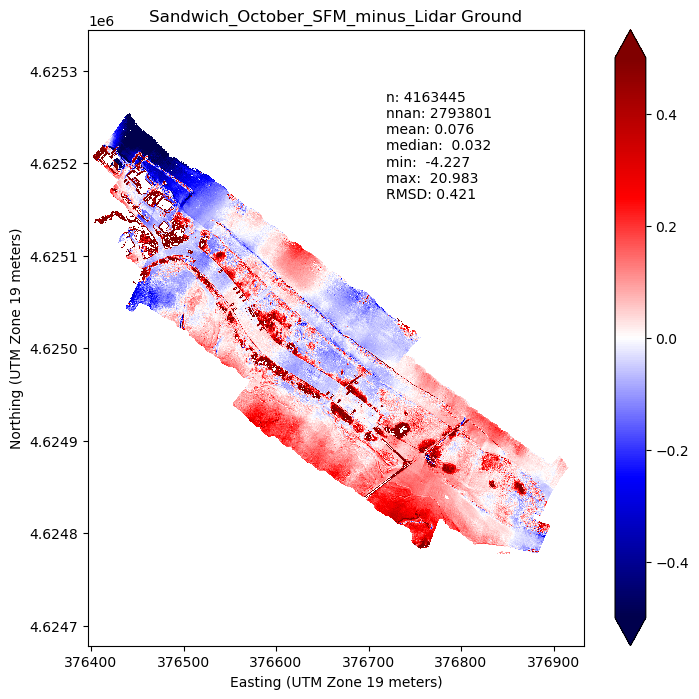

In [22]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
m = ax.pcolormesh(x, y, z, vmin=-.5, vmax=.5, cmap='seismic')
ax.set_xlabel('Easting (UTM Zone 19 meters)')
ax.set_ylabel('Northing (UTM Zone 19 meters)')
plt.axis('equal')
plt.colorbar(m, extend='both')
plt.text(.6, .7, stext, transform=ax.transAxes)
plt.title(outtitle)
plt.savefig(ddir+outtitle+'.jpg', dpi=200, bbox_inches='tight')